In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

quarterly18 = pd.read_csv('../data/2018quarterly.csv')
quarterly20 = pd.read_csv('../data/2020TABLE8.csv')

# About Nike Data
- Fiscal years ending on May 31st
- Amounts are in millions except for margin which is a percentage
- Data collected from: [investors.nike.com](https://investors.nike.com/investors/news-events-and-reports/?toggle=reports)
- Each year has four quarters
- Additional information was added from the SEC EDGAR website
- Data collected from: [SEC EDGAR NYSE:NKE](https://www.sec.gov/edgar/browse/?CIK=320187&owner=exclude)

In [9]:
quarterly20.drop(columns='Created by EDGAR Online, Inc.',index=[0,1,2,3,4,5,6,7,8,10,15,16,17,18,19,20,21,22,23,24,25,26,27],inplace=True)

quarterly20.dropna(inplace=True)
quarterly20 = quarterly20.rename(columns={
    'Unnamed: 1':'statistic','Unnamed: 2':'1stquart_20','Unnamed: 3':'1stquart_19','Unnamed: 4':'2ndquart_20','Unnamed: 5':'2ndquart_19','Unnamed: 6':'3rdquart_20','Unnamed: 7':'3rdquart_19','Unnamed: 8':'4thquart_20','Unnamed: 9':'4thquart_19'
})
quarterly20_transposed = quarterly20.transpose()
quarterly20_transposed = quarterly20_transposed.reset_index()
quarterly20_transposed['statistic'] = quarterly20_transposed['index']
quarterly20_transposed.drop(index=0,columns='index',inplace=True)
quarterly20_transposed.rename(columns={
    11:'year',12:'revenues',13:'grossProfit',14:'grossMargin'
},inplace=True)

quarterly20_transposed[['year','revenues','grossProfit','grossMargin']]= quarterly20_transposed[['year','revenues','grossProfit','grossMargin']].replace('[$,.%]','',regex=True)

quarterly20_transposed[['year','revenues','grossProfit','grossMargin']]= quarterly20_transposed[['year','revenues','grossProfit','grossMargin']].astype(int) 

quarterly20_transposed['grossMargin'] = quarterly20_transposed['grossMargin'] / 10000

quarterly20_transposed.sort_values(by='year',inplace=True)
quarterly20_transposed

,year,revenues,grossProfit,grossMargin,statistic
2,2019,9948,4397,0.442,1stquart_19
4,2019,9374,4105,0.438,2ndquart_19
6,2019,9611,4339,0.451,3rdquart_19
8,2019,10184,4633,0.455,4thquart_19
1,2020,10660,4871,0.457,1stquart_20
3,2020,10326,4544,0.440,2ndquart_20
5,2020,10104,4473,0.443,3rdquart_20
7,2020,6313,2353,0.373,4thquart_20


In [10]:
# drop columns will null 
quarterly18 = quarterly18.dropna()
quarterly18.reset_index()
# drop specific rows
quarterly18 = quarterly18.drop(index=[5,8,9,11,14,16,19,20])
quarterly18 = quarterly18.rename(columns={
    '(Unaudited)':'statistic','1st Quarter':'1stquart_18','Unnamed: 2':'1stquart_17','2nd Quarter':'2ndquart_18','Unnamed: 4':'2ndquart_17','3rd Quarter':'3rdquart_18','Unnamed: 6':'3rdquart_17','4th Quarter':'4thquart_18','Unnamed: 8':'4thquart_17'
})
# switch rows and columns w transpose 
quarterly18_transposed = quarterly18.transpose()
quarterly18_transposed = quarterly18_transposed.reset_index()
quarterly18_transposed['statistic'] = quarterly18_transposed['index']
quarterly18_transposed.drop(index=0,columns='index',inplace=True)
quarterly18_transposed.rename(columns={
    1:'year',2:'revenues',3:'grossProfit',4:'grossMargin'
},inplace=True)
# remove dollar signs etc.
quarterly18_transposed[['year','revenues','grossProfit','grossMargin']]= quarterly18_transposed[['year','revenues','grossProfit','grossMargin']].replace('[$,.%]','',regex=True)
# change types to int
quarterly18_transposed[['year','revenues','grossProfit','grossMargin']]= quarterly18_transposed[['year','revenues','grossProfit','grossMargin']].astype(int) 
# divide gross Margin to change into percentage
quarterly18_transposed['grossMargin'] = quarterly18_transposed['grossMargin'] / 10000

quarterly18_transposed.sort_values(by='year',inplace=True)
quarterly18_transposed

,year,revenues,grossProfit,grossMargin,statistic
2,2017,9061,4123,0.455,1stquart_17
4,2017,8180,3616,0.442,2ndquart_17
6,2017,8432,3750,0.445,3rdquart_17
8,2017,8677,3823,0.441,4thquart_17
1,2018,9070,3962,0.437,1stquart_18
3,2018,8554,3678,0.430,2ndquart_18
5,2018,8984,3938,0.438,3rdquart_18
7,2018,9789,4378,0.447,4thquart_18


In [11]:
# Merge tables with quarterly data from 2017,2018,2019,2020

quarterly = pd.concat([quarterly18_transposed,quarterly20_transposed])
quarterly.sort_values(by='year',inplace=True)
quarterly.reset_index(inplace=True)
quarterly
# Numbers are in million, except for margin which is a percentage 

,index,year,revenues,grossProfit,grossMargin,statistic
0,2,2017,9061,4123,0.455,1stquart_17
1,4,2017,8180,3616,0.442,2ndquart_17
2,6,2017,8432,3750,0.445,3rdquart_17
3,8,2017,8677,3823,0.441,4thquart_17
4,1,2018,9070,3962,0.437,1stquart_18
5,3,2018,8554,3678,0.430,2ndquart_18
6,5,2018,8984,3938,0.438,3rdquart_18
7,7,2018,9789,4378,0.447,4thquart_18
8,2,2019,9948,4397,0.442,1stquart_19
9,4,2019,9374,4105,0.438,2ndquart_19


In [12]:
# ADD 2021 quarterly data
# new_data = pd.DataFrame({
#     'year': [2021,2021,2021,2021],
#     'Revenue': [12000],
#     'grossProfit': [1800],
#     'grossMargin':[]
# })

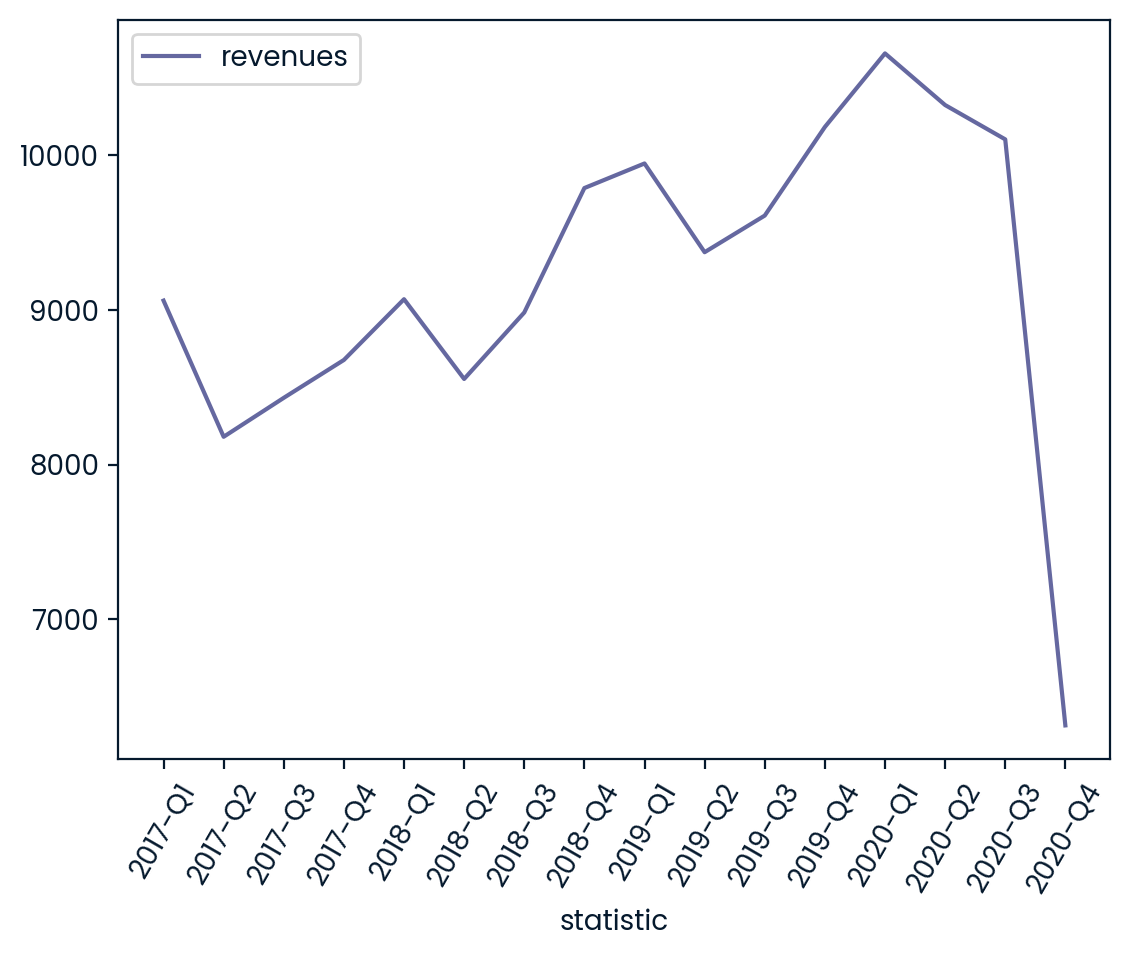

In [13]:
# quarterly.sort_values(by='year', inplace=True)

quarterly.plot(kind='line', x='statistic', y='revenues')
# colors = {2017: 'blue', 2018: 'green', 2019: 'orange', 2020: 'red'}
# for year, group in quarterly.groupby('year'):
#     plt.plot(group['statistic'], group['revenues'], label=str(year), color=colors[year])


# Define the labels for the x-ticks
labels = ['2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4',
          '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4',
          '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4',
          '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4']
# ,'2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4'

# Set the x-ticks with the defined labels
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=60)
# plt.legend()
# plt.grid()
# Show the plot
plt.show()

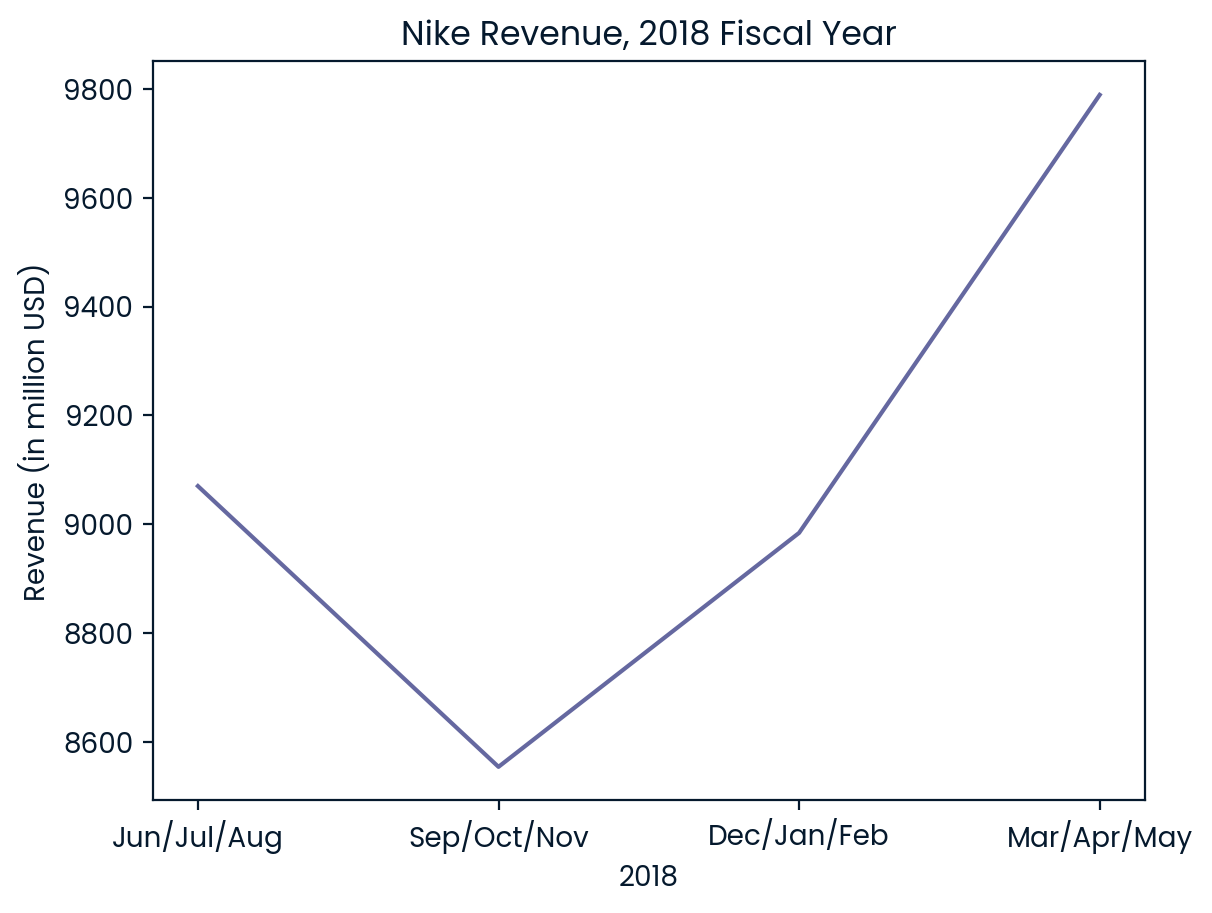

In [14]:
twenty_18 = quarterly[quarterly['year'] == 2018]
labels= ['Jun/Jul/Aug','Sep/Oct/Nov','Dec/Jan/Feb','Mar/Apr/May']
twenty_18.plot(kind='line', x='statistic', y='revenues',legend=False)
plt.xlabel('2018')
plt.ylabel('Revenue (in million USD)')
plt.title('Nike Revenue, 2018 Fiscal Year')
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.show()

In [ ]:
fiscal_yr_agg = quarterly.groupby('Year').agg()

adidas_combined = adidas_dropped.groupby('YearMonth').agg({
    'Units Sold Sum': 'sum',
    'Operating Profit Sum': 'sum',
    'Operating Margin Sum': 'sum',
    'Operating Margin Median': 'median'
}).reset_index()


KeyError: 'Year'

# About Adidas Data
- Dataframe created by extracting specific data from fiscal years, 2017-2020
- [Adidas Financial Reports](https://www.adidas-group.com/en/investors/financial-reports)
- Data is originally in euros but is now converted to usd

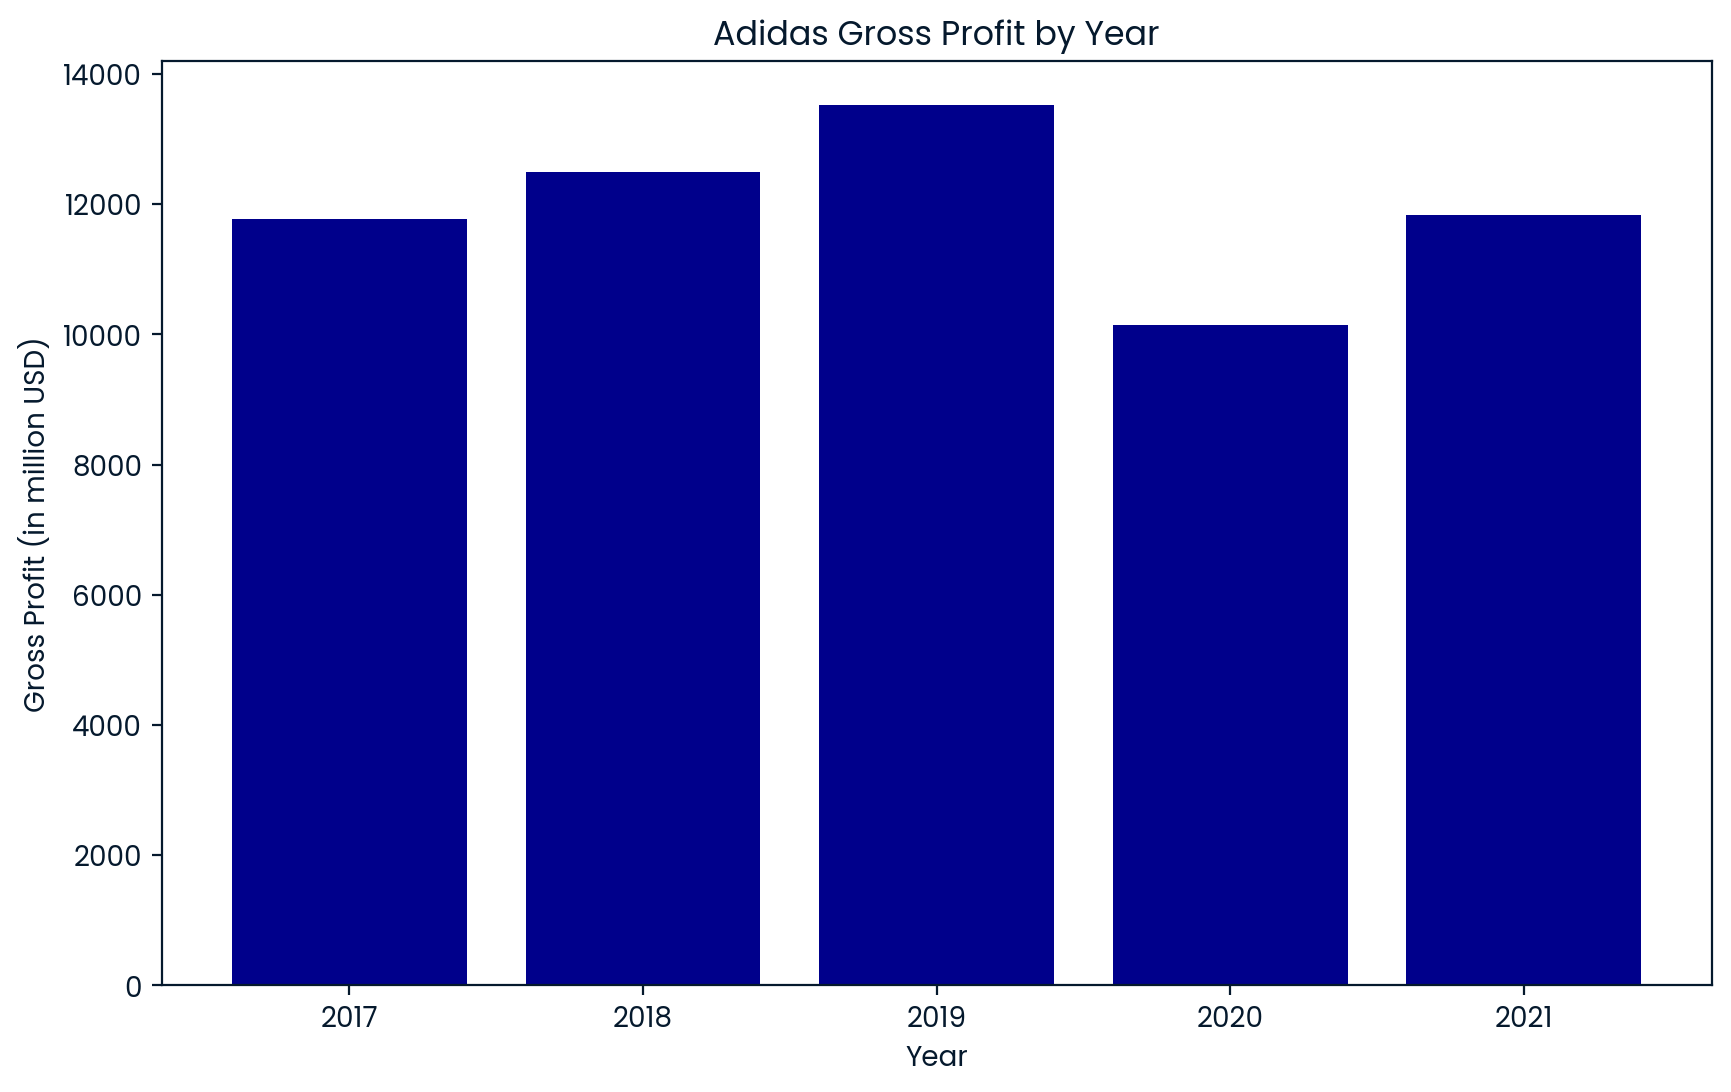

In [11]:

df = {
    'date': [2017, 2018, 2019, 2020, 2021],
    'grossProfit': [11767.63, 12493.28, 13515.78, 10139.31, 11835.79]
}

adidas = pd.DataFrame(df)

# Create a bar graph of gross profit
plt.figure(figsize=(10, 6))
plt.bar(adidas['date'], adidas['grossProfit'], color='darkblue')
plt.xlabel('Year')
plt.ylabel('Gross Profit (in million USD)')
plt.title('Adidas Gross Profit by Year')
plt.xticks(adidas['date'])
plt.show()